# 13. 단편

알고리즘 수업에서 오랜만에 나온 정렬 문제였습니다. 다만, 이전의 정렬 문제와는 다르게 Radix를 이용해야 한다는 특징이 있습니다. 

사실 Radix를 쓰지 않아도 1초 안에 주어진 데이터를 다 정렬할 수만 있다면, Radix를 쓰지 않아도 되긴 합니다. 문제는 입력되는 데이터가 최대 100개에 각 데이터의 최대 크기는 62.5Kb(500,000만 글자)라는 점입니다. 이런 데이터를 제한 시간 1초 안에 정렬하려면 여러 정렬 알고리즘을 활용해서 구현을 해야 할 것입니다.

"데이터를 잘 이해해야지 좋은 알고리즘을 짤 수 있다." 교수님이 수업 중에 하신 말씀과 잘 어울리는 문제였습니다. 데이터의 이해가 가장 기본된다는 점이 제 전공인 통계학과 비슷해서 재밌게 느껴졌습니다.  

## 문제

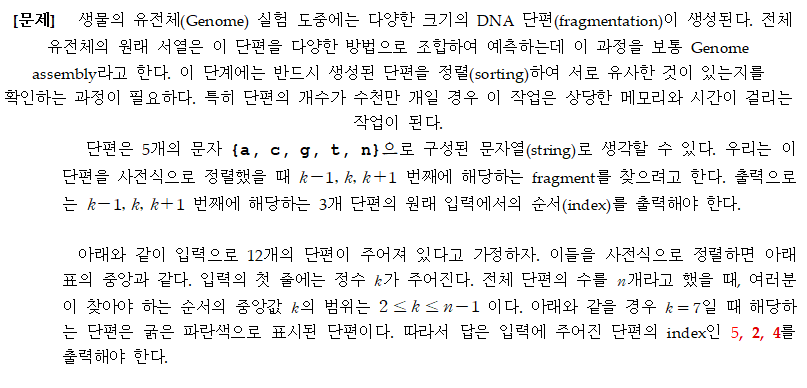

## 입출력

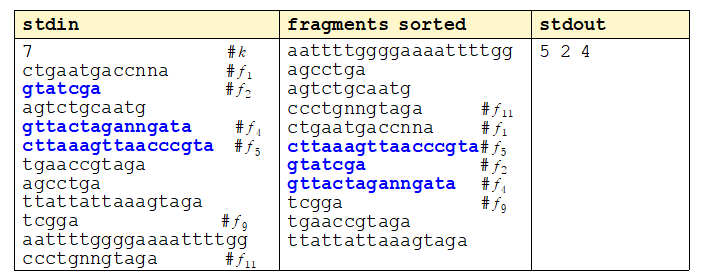

## 기본 세팅

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True) # gdrive 수정 가능하게 함 

Mounted at /content/drive/


In [ ]:
# 수정
add = "_13_단편(정렬)/"

PROJECT_DIR = "/content/drive/MyDrive/2022년/1학기/Computer_Algorithm/과제 파일/" + add

def inp_pth(i):
  return PROJECT_DIR + 'sample/0' + str(i) + '.inp'

def out_pth(i):
  return PROJECT_DIR + 'sample/0' + str(i) + '.out'

In [ ]:
def test():
  for i in range(1, 6):
    print(f"[{i}]")
    inp_path = inp_pth(i)
    with open(inp_path, 'r') as inp:
      input = inp.readlines()
      
    node_count = int(input[0].split()[0])
    class_ = Stack(node_count)

    out_path = out_pth(i)
    with open(out_path) as out:
      answer = out.read()
    
    class_.input(input[1:])

    class_.out()
    print(f"(answer)\n{answer}")


In [ ]:
import numpy as np

## 풀이

### 데이터(문자열)의 성질 : 앞의 Radix가 절대적으로 중요하다

문자열을 사전식으로 정렬할 때, 아주 중요한 점은 앞에 있는 Radix가 뒤에 있는 Radix보다 절대적으로 중요하다는 점입니다.

예를 들어, 'azzzzz' 와 'baaaa'를 정렬한다고 하면 뒤에 있는 z나 a와 관계 없이 맨 앞에 있는 a와 b의 비교로 둘의 순서가 결정됩니다.

이런 성질을 이용해서 Bucket 정렬을 변형해서 응용할 수 있겠다는 생각을 했습니다. 

예를 들어 아래의 표 첫번째 열이 데이터로 주어졌다고 합시다. 

만약 우리가 k=2, 즉 첫번째, 두번째, 세번째로 작은 데이터를 찾는다고 하면, 

맨 앞이 a인 데이터가 5개이기 때문에 우리가 찾는 데이터는 반드시 맨 앞이 a여야 합니다.

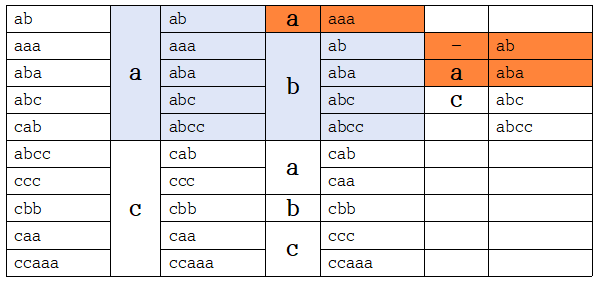

따라서 맨 앞이 a인 데이터들만 다시 Bucket 정렬을 실시합니다. 이런 과정을 계속 반복하다보면 우리가 원하는 데이터를 찾을 수 있을 것입니다.

**이 방법의 장점은 아래와 같습니다.**

**1. 각 데이터의 모든 값을 이용하지 않아도 된다.**  
**2. 모든 데이터를 비교하지 않아도 된다.**

### 생각해볼 점 : Complexity

다만, 위의 방법은 한 가지 문제가 있습니다. Bucket 정렬을 계속 실시하는 과정에서 점점 더 Case들이 많아진다는 점입니다.

위의 표에서는 a, b, c만을 사용해서 경우의 수가 많지 않지만, 실제로는 한 번 bucket 정렬을 실시할 때마다 경우의 수가 27배(알파벳 26개 + 공백 1개)로 늘어납니다. 따라서 generic 정렬을 구현할 때처럼 critical size 미만으로는 다른 정렬 알고리즘을 사용하는 것이 좋을 수도 있습니다.

다만, 이번 문제의 경우는 데이터 갯수가 100개 밖에 되지 않고, 찾아야 하는 데이터의 갯수도 3개 밖에 되지 않습니다. 

따라서 이런 경우에는 위의 방식으로 충분히 답을 찾아낼 수 있습니다.

### 위의 내용을 구현한 의사 코드 

```
Bucket Sort:
	Input D : Data, id : index of instance in D
	Input T_0 : A set of target ranks
	
	I <- a set of index id. {0, 1, 2, 3 ...}
	p <- 0

	SI = [[0, 1, 2, 3, ...]]
	T = [None for t in T_0]
	
	while :
		B = [[], ...]

		for I in SI:
			newB <- [[], [], ...]

			for i = 0 to len(I) do:
				key = D[i]
				newB[key[p]].append(key)
			
			for i = 0 to len(newB) do:
				if len(newB[i]) > 0 : B.append(newB[i])

		I <- []
		tot <- 0

		for i = 0 to len(B) do:
			tot += len(B[i])

			for j = 0 to len(T) do:
				if T[j] is finded: continue
				if tot == T_0[j] and len(B[i]) == 1:
					T[j] <- B[i][0]
			
			if every t in T is finded:
				return {t}			
			
			maxT <- maximum of unfinded target ranks
			minT <- minimum of unfinded target ranks	
			
			if tot > maxT:
				while tot > minT:
					I = [B[i]] + I
					tot -= len(B[i])
					i -= 1
				break
		
		T_0 = [ t - tot for t in T_0]
		p += 1


```



### 실제 코드

In [ ]:
import sys

def bucket_finding(D, k, print_ = True):
  T_0 = [k-1, k, k+1]
  I = range(len(D))
  p = 0
  T = [None for t in T_0]
  minT = k-1
  maxT = k+1

  if print_: print(f"TARGET : {k}")#

  while p < 101 and len(I) > 0:
    if print_: print(f"[PHASE : {p}]\n")#

    B = [ [] for _ in range(27) ]

    for i in I:
      key = D[i]
      if print_: print(key)#

      if p >= len(key):
        B[0].append(i)
      else:
        B[ord(key[p]) - ord('a') + 1].append(i)
    
    I = []
    tot = 0

    for i in range(len(B)):
      tot += len(B[i])

      check = True
      for j in range(len(T)):
        if not T[j] is None: continue
        else:  
          if tot == T_0[j] and len(B[i]) == 1:
            T[j] = B[i][0]
            if print_:#
              print(f"FIND {T_0[j]} : {T[j]}!")

            if len([T_0[j] for j in range(len(T)) if T[j] is None]) >0 :
              minT = min([T_0[j] for j in range(len(T)) if T[j] is None])
              maxT = max([T_0[j] for j in range(len(T)) if T[j] is None])

          else: check = False
      
      if check:
        return T
      
      if tot > maxT:
        while tot > minT:
          I = B[i] + I
          tot -= len(B[i])

          if i == 0: break
          else: i -= 1
        break
      
    
    T_0 = [ t - tot for t in T_0]
    p += 1

In [ ]:
import sys

def bucket_finding(D, k, print_ = True):
  T_0 = [k-1, k, k+1]
  T_0_ = [k-1, k, k+1]

  SI = [range(len(D))]
  p = 0
  T = [None for t in T_0]
  minT = k-1
  maxT = k+1

  if print_: print(f"TARGET : {k}")#

  while p < 101:
    if print_: print(f"[PHASE : {p}]\n")#

    B = []

    for I in SI:
      newB = [ [] for _ in range(27) ]

      for i in I:
        key = D[i]
        if print_: print(key)#

        if p >= len(key):
          newB[0].append(i)
        else:
          newB[ord(key[p]) - ord('a') + 1].append(i)
      
      for b in newB:
        if len(b) > 0 : B.append(b)


    SI = []
    tot = 0

    for i in range(len(B)):
      tot += len(B[i])

      check = True
      for j in range(len(T)):
        if not T[j] is None: continue
        else:  
          if tot == T_0[j] and len(B[i]) == 1:
            T[j] = B[i][0]
            if print_:#
              print(f"FIND {T_0_[j]} : {T[j]}!")

          else: check = False
      
      if check:
        return [ t+1 for t in T]
      
      T_None = [T_0[j] for j in range(len(T)) if T[j] is None]
      if len(T_None) >0 :
        minT = min(T_None)
        maxT = max(T_None)

      if print_: print(tot, tot > maxT)
      if tot > maxT:
        while tot >= minT:
          SI = [B[i]] + SI
          tot -= len(B[i])

          if i == 0: break
          else: i -= 1
        if print_: print(SI)#
        break
    
    
    T_0 = [ t - tot for t in T_0]
    if print_: print(T_0)
    p += 1

In [ ]:
def test(a = 1, b = 5):
  for i in range(a, b+1):
    print(f"[{i}]")
    inp_path = inp_pth(i)
    with open(inp_path, 'r') as inp:
      input = inp.readlines()
      
    count = int(input[0])
    output = bucket_finding(input[1:], count, False)

    out_path = out_pth(i)
    with open(out_path) as out:
      answer = out.read()
    
    print(f"(answer) : {answer}, (output) : {output}")

In [ ]:
test()

[1]
(answer) : 3
2
8
, (output) : [3, 2, 8]
[2]
(answer) : 3
4
6
, (output) : [3, 4, 6]
[3]
(answer) : 14
17
6
, (output) : [14, 17, 6]
[4]
(answer) : 16
5
10
, (output) : [16, 5, 10]
[5]
(answer) : 20
8
19
, (output) : [20, 8, 19]


## 최종 제출 파일

In [ ]:
len(sys.stdin.readline())

0

In [ ]:
import sys

k = int(sys.stdin.readline())
D = []


while True:
  inp = sys.stdin.readline()
  if len(inp) == 0: break
  else: D.append(inp)


def bucket_finding(k):
  global D

  T_0 = [k-1, k, k+1]
  T_0_ = [k-1, k, k+1]

  SI = [range(len(D))]
  p = 0
  T = [None for t in T_0]
  minT = k-1
  maxT = k+1

  while p < 101:
    B = []

    for I in SI:
      newB = [ [] for _ in range(27) ]

      for i in I:
        key = D[i]

        if p >= len(key):
          newB[0].append(i)
        else:
          newB[ord(key[p]) - ord('a') + 1].append(i)
      
      for b in newB:
        if len(b) > 0 : B.append(b)


    SI = []
    tot = 0

    for i in range(len(B)):
      tot += len(B[i])

      check = True
      for j in range(len(T)):
        if not T[j] is None: continue
        else:  
          if tot == T_0[j] and len(B[i]) == 1:
            T[j] = B[i][0]

          else: check = False
      
      if check:
        return [ t+1 for t in T]
      
      T_None = [T_0[j] for j in range(len(T)) if T[j] is None]
      if len(T_None) >0 :
        minT = min(T_None)
        maxT = max(T_None)

      if tot > maxT:
        while tot >= minT:
          SI = [B[i]] + SI
          tot -= len(B[i])

          if i == 0: break
          else: i -= 1
        break
    
    
    T_0 = [ t - tot for t in T_0]
    p += 1

bucket_finding(k)

## 결과

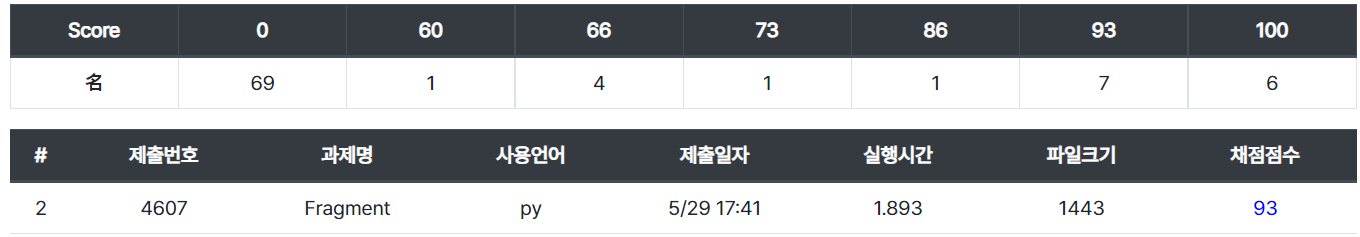